# Composition Plot

## Bar Chart

### Step 1 : Initialize Global Setting

In [7]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches
import squarify
import random
# Setting up the params
large = 22
med =16
small= 12

params = {
    'axes.titlesize':large,
    'legend.fontsize':med,
    'figure.figsize':(16,10),
    'axes.labelsize':med,
    'xtick.labelsize':med,
    'ytick.labelsize':med,
    'figure.titlesize':large
    
}

#override default parameters of plot

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')




### Step 2 :  Import dataset 

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/mukesh-ranjan/LearnDataAnalysisFromScratch/master/Data/mpg.csv")
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


### Step 3 : Prepare Data

In [17]:
df_processed=df.groupby('manufacturer').size().reset_index(name='counts')
n=df_processed['manufacturer'].unique().__len__()+1
all_colors=list(plt.cm.colors.cnames.keys())
random.seed(100)
c=random.choices(all_colors,k=n)

### Step 4 : Draw Plot

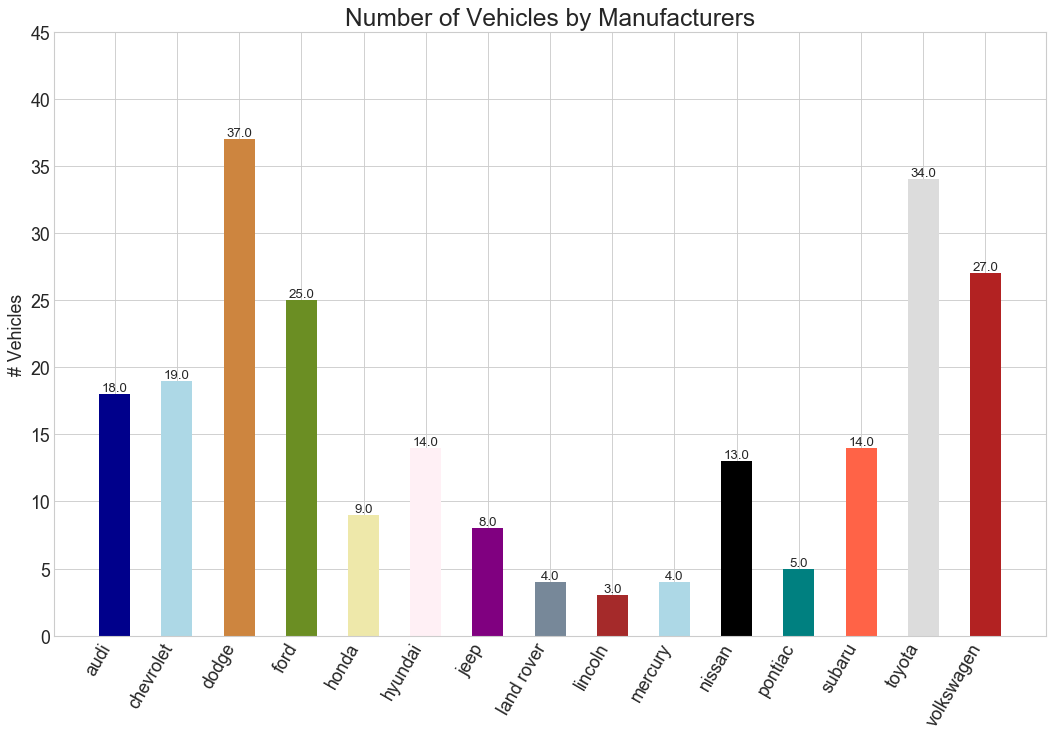

In [18]:
plt.figure(figsize=(16,10),dpi=80)
plt.bar(df_processed['manufacturer'],df_processed['counts'],color=c,width=.5)

for i,val in enumerate(df_processed['counts'].values):
    plt.text(i,val,float(val),horizontalalignment='center',verticalalignment='bottom',fontdict={'fontweight':500,'size':small})
    
plt.gca().set_xticklabels(df_processed['manufacturer'],rotation=60,horizontalalignment='right')
plt.title('Number of Vehicles by Manufacturers',fontsize=large)
plt.ylabel('# Vehicles')
plt.ylim(0,45)
plt.show()    

### Step 5 : Decorate Plots with Right Labels